In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_excel(r"C:\Users\Sarah\Downloads\Use_case_data.xlsx")

In [11]:
data.head()

,User_ID,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Member_since,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk
0,10386.0,male,34.6,A,Non_Verified,Homosexual,Switch,Men,50,41169,32,0.0,0.0,0.0,No_risk
1,14.0,male,32.2,J,Non_Verified,Heterosexual,Dominant,Women,518,40118,710,9.0,0.0,0.0,No_risk
2,16721.0,male,33.6,K,Non_Verified,Heterosexual,Dominant,Women,150,41365,25,1.0,1.0,45.0,No_risk
3,16957.0,male,34.0,H,Non_Verified,Heterosexual,Dominant,Women,114,41372,107,1.0,0.0,1.0,No_risk
4,17125.0,male,39.5,B,Non_Verified,Heterosexual,Dominant,Women,497,41378,600,0.0,6.0,8.0,No_risk


In [17]:
data['Risk'].value_counts()

No_risk      57
High_risk    32
Name: Risk, dtype: int64

In [21]:
data.dtypes

User_ID                                float64
Gender                                  object
Age                                    float64
Location                                object
Verification                            object
Sexual_orientation                      object
Sexual_polarity                         object
Looking_for                             object
Points_Rank                             object
Member_since                             int64
Number_of_Comments_in_public_forum       int64
Number_of_advertisments_posted         float64
Number_of_offline_meetings_attended    float64
Profile_pictures                       float64
Risk                                    object
dtype: object

In [27]:
data['Points_Rank'] = pd.to_numeric(data['Points_Rank'],errors='coerce')

In [33]:
data.dtypes

User_ID                                float64
Gender                                  object
Age                                    float64
Location                                object
Verification                            object
Sexual_orientation                      object
Sexual_polarity                         object
Looking_for                             object
Points_Rank                            float64
Member_since                             int64
Number_of_Comments_in_public_forum       int64
Number_of_advertisments_posted         float64
Number_of_offline_meetings_attended    float64
Profile_pictures                       float64
Risk                                    object
dtype: object

In [45]:
data.isnull().sum()
data.dropna(inplace=True)

In [46]:
data.isnull().sum()


User_ID                                0
Gender                                 0
Age                                    0
Location                               0
Verification                           0
Sexual_orientation                     0
Sexual_polarity                        0
Looking_for                            0
Points_Rank                            0
Member_since                           0
Number_of_Comments_in_public_forum     0
Number_of_advertisments_posted         0
Number_of_offline_meetings_attended    0
Profile_pictures                       0
Risk                                   0
dtype: int64

In [47]:
data_dummy = pd.get_dummies(data=data.drop(['Risk'], axis=1),drop_first=False)
data_dummy.columns

Index(['User_ID', 'Age', 'Points_Rank', 'Member_since',
       'Number_of_Comments_in_public_forum', 'Number_of_advertisments_posted',
       'Number_of_offline_meetings_attended', 'Profile_pictures',
       'Gender_female', 'Gender_male', 'Location_A', 'Location_B',
       'Location_C', 'Location_E', 'Location_F', 'Location_H', 'Location_J',
       'Location_K', 'Location_L', 'Location_M', 'Location_N', 'Location_O',
       'Location_S', 'Verification_Non_Verified', 'Verification_Verified',
       'Sexual_orientation_Heterosexual', 'Sexual_orientation_Homosexual',
       'Sexual_orientation_bicurious', 'Sexual_orientation_bisexual',
       'Sexual_polarity_Dominant', 'Sexual_polarity_Submisive',
       'Sexual_polarity_Switch', 'Looking_for_Men',
       'Looking_for_Men_and_Women', 'Looking_for_Nobody',
       'Looking_for_Nobody_but_maybe', 'Looking_for_Women'],
      dtype='object')

In [48]:
risk = data["Risk"]
data_dummy = data_dummy.join(risk)

In [49]:
data_dummy

,User_ID,Age,Points_Rank,Member_since,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Gender_female,Gender_male,...,Sexual_orientation_bisexual,Sexual_polarity_Dominant,Sexual_polarity_Submisive,Sexual_polarity_Switch,Looking_for_Men,Looking_for_Men_and_Women,Looking_for_Nobody,Looking_for_Nobody_but_maybe,Looking_for_Women,Risk
0,10386.0,34.6,50.0,41169,32,0.0,0.0,0.0,0,1,...,0,0,0,1,1,0,0,0,0,No_risk
1,14.0,32.2,518.0,40118,710,9.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,No_risk
2,16721.0,33.6,150.0,41365,25,1.0,1.0,45.0,0,1,...,0,1,0,0,0,0,0,0,1,No_risk
3,16957.0,34.0,114.0,41372,107,1.0,0.0,1.0,0,1,...,0,1,0,0,0,0,0,0,1,No_risk
4,17125.0,39.5,497.0,41378,600,0.0,6.0,8.0,0,1,...,0,1,0,0,0,0,0,0,1,No_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,5648.0,41.4,62.0,41084,30,0.0,0.0,7.0,0,1,...,0,0,1,0,1,0,0,0,0,High_risk
84,5675.0,36.2,52.0,41088,51,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,1,High_risk
85,5782.0,29.9,155.0,41091,209,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,1,High_risk
86,6035.0,52.3,114.0,41092,120,1.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,1,High_risk


In [50]:
data_dummy.dtypes

User_ID                                float64
Age                                    float64
Points_Rank                            float64
Member_since                             int64
Number_of_Comments_in_public_forum       int64
Number_of_advertisments_posted         float64
Number_of_offline_meetings_attended    float64
Profile_pictures                       float64
Gender_female                            uint8
Gender_male                              uint8
Location_A                               uint8
Location_B                               uint8
Location_C                               uint8
Location_E                               uint8
Location_F                               uint8
Location_H                               uint8
Location_J                               uint8
Location_K                               uint8
Location_L                               uint8
Location_M                               uint8
Location_N                               uint8
Location_O   

# Test_train_split

In [51]:
from sklearn.model_selection import train_test_split
x = data_dummy.drop(['Risk'],axis=1) # X is all the independant variables ('features') 
y = data_dummy['Risk'] # Y is our Target, or labels, dependant variable

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=5)


In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

# Testing logistic regressing (poor accuracy so not tested further)

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')

In [56]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [57]:
y_pred = lr.predict(x_test)
# Predict probabilities
probs_y=lr.predict_proba(x_test)
### Print results 
probs_y = np.round(probs_y, 2)
print('The accuracy of the Logistic Regression is:', lr.score(X_test, y_test) * 100, '%')

The accuracy of the Logistic Regression is: 16.666666666666664 %


# Decision tree

In [87]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
tree.fit(x_train,y_train)
prediction=tree.predict(x_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.889


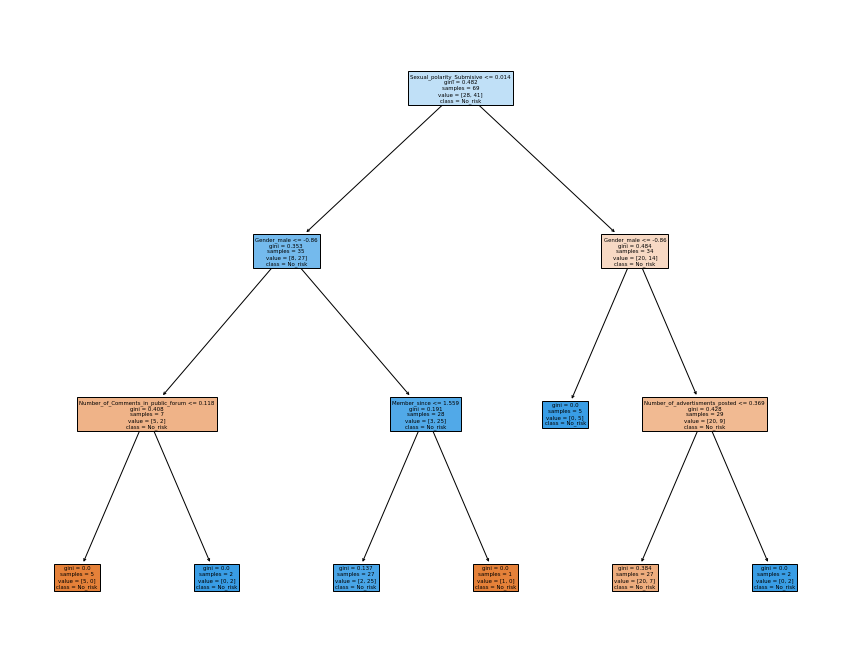

In [70]:
plt.figure(figsize = (15,12))
fn = X_train.columns
cn = y_train
plot_tree(tree, feature_names = fn, class_names = cn, filled = True);

# Creating new data to predict

In [74]:
new_data = pd.DataFrame(columns = X_test.columns)

In [75]:
new_data

,User_ID,Age,Points_Rank,Member_since,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Gender_female,Gender_male,...,Sexual_orientation_bicurious,Sexual_orientation_bisexual,Sexual_polarity_Dominant,Sexual_polarity_Submisive,Sexual_polarity_Switch,Looking_for_Men,Looking_for_Men_and_Women,Looking_for_Nobody,Looking_for_Nobody_but_maybe,Looking_for_Women


In [79]:
new_data1 ={'User_ID': 1, 'Age': 30, 'Points_Rank':50, 'Member_since': 41169,
       'Number_of_Comments_in_public_forum': 120, 'Number_of_advertisments_posted':1,
       'Number_of_offline_meetings_attended':0, 'Profile_pictures':2,
       'Gender_female':0, 'Gender_male':1, 'Location_A':1, 'Location_B':0,
       'Location_C':0, 'Location_E':0, 'Location_F':0, 'Location_H':0, 'Location_J':0,
       'Location_K':0, 'Location_L':0, 'Location_M':0, 'Location_N':0, 'Location_O':0,
       'Location_S':0, 'Verification_Non_Verified':1, 'Verification_Verified':0,
       'Sexual_orientation_Heterosexual':1, 'Sexual_orientation_Homosexual':0,
       'Sexual_orientation_bicurious':0, 'Sexual_orientation_bisexual':0,
       'Sexual_polarity_Dominant':0, 'Sexual_polarity_Submisive':0,
       'Sexual_polarity_Switch':1, 'Looking_for_Men':0,
       'Looking_for_Men_and_Women':0, 'Looking_for_Nobody':0,
       'Looking_for_Nobody_but_maybe':0, 'Looking_for_Women':1}

In [78]:
new_data2 = {'User_ID':2, 'Age':30, 'Points_Rank':518, 'Member_since':40118,
       'Number_of_Comments_in_public_forum':100, 'Number_of_advertisments_posted':9,
       'Number_of_offline_meetings_attended':0, 'Profile_pictures':3,
       'Gender_female':1, 'Gender_male':0, 'Location_A':0, 'Location_B':0,
       'Location_C':0, 'Location_E':0, 'Location_F':0, 'Location_H':0, 'Location_J':0,
       'Location_K':0, 'Location_L':0, 'Location_M':0, 'Location_N':0, 'Location_O':0,
       'Location_S':0, 'Verification_Non_Verified':1, 'Verification_Verified':1,
       'Sexual_orientation_Heterosexual':1, 'Sexual_orientation_Homosexual':0,
       'Sexual_orientation_bicurious':0, 'Sexual_orientation_bisexual':0,
       'Sexual_polarity_Dominant':1, 'Sexual_polarity_Submisive':0,
       'Sexual_polarity_Switch':0, 'Looking_for_Men':1,
       'Looking_for_Men_and_Women':0, 'Looking_for_Nobody':0,
       'Looking_for_Nobody_but_maybe':0, 'Looking_for_Women':0}

In [80]:
new_data = pd.DataFrame()

In [82]:
new_data = new_data.append(new_data1, ignore_index=True)

In [84]:
new_data = new_data.append(new_data2, ignore_index=True)

In [88]:
prediction=tree.predict(new_data)
prediction

array(['High_risk', 'High_risk'], dtype=object)